# Gota Plana - Benchmark

## Dados de Domínio

In [15]:
import numpy as np
from matplotlib import pyplot as plt
import statistics as st
X = 20 #Comprimento no eixo X
Y = 20 #Comprimento no eixo Y
Z = 20 #Comprimento no eixo Z
raio = 7 #Raio da Gota
d = 3 #Raio de Rastreio no ponto de Ângulo de contato
n = 5 # Número de casos entre 0 e 180º

#Matrizes 1D
angP = np.zeros((n),dtype="float")
angreal = np.zeros((n),dtype="float")
mediana = np.zeros((n),dtype="float")
maximo = np.zeros((n),dtype="float")
minimo = np.zeros((n),dtype="float")
#Matrizes 3D do domínio
X2 = np.linspace(0.0, float(X), X+1) 
Y2 = np.linspace(0.0, float(Y), Y+1) 
Z2 = np.linspace(0.0, float(Z), Z+1) 
X2, Y2, Z2 = np.meshgrid(Z2,Y2,X2)

## Geração da Gota Plana

$D(x,y,z)=1 \quad \longrightarrow \quad \textrm{Fluido em suspensão}$

$D(x,y,z)=2 \quad \longrightarrow \quad \textrm{Gota}$

$D(x,y,z)=0 \quad \longrightarrow \quad \textrm{Sólido}$

fds

In [16]:
def gotaplano(I, J, K, raio, angulo):
    D=np.ones((I,J,K),dtype="uint8")
    a: int = K/10
    cx = I/2
    cy = J/2
    cz = a + 0.5 + raio*np.cos(angulo)
    for i in range(0,I):
        for j in range (0, J):
            for k in range (0, K):
                dist = np.sqrt((i-cx)*(i-cx) + (j-cy)*(j-cy) + (k-cz)*(k-cz))
                if (dist <= raio) :
                    D[i,j,k] = 2
                if k <= a:
                    D[i,j,k] = 0
    if(raio<=2):print("raio menor que a distância da parede")
    return D;

## Rastreamento de pontos

In [17]:
def rastrear3d(D):
    X, Y, Z = np.shape(D)
    P=np.zeros((X,Y,Z),dtype="uint8")
    for i in range(0,X):
        for j in range (0, Y):
            for k in range (0, Z):
                if D[i,j,k] == 2:
                    if D[i+1,j,k]==0 or D[i-1,j,k]==0 or D[i,j+1,k]==0 or D[i,j-1,k]==0 or D[i,j,k+1]==0 or D[i,j,k-1]==0:
                        P[i,j,k] = 1
                    if D[i+1,j,k]==1 or D[i-1,j,k]==1 or D[i,j+1,k]==1 or D[i,j-1,k]==1 or D[i,j,k+1]==1 or D[i,j,k-1]==1:
                        P[i,j,k] = 2
                        if D[i+1,j,k]==0 or D[i-1,j,k]==0 or D[i,j+1,k]==0 or D[i,j-1,k]==0 or D[i,j,k+1]==0 or D[i,j,k-1]==0:
                            P[i,j,k] = 3
    return P;

## Calculo do Plano 3D

In [18]:
def encontrarpontosconectados3d(P, d, M, N, O, fl1, fl2):
    #pocura esferico, não quadrado
    conectados = np.zeros((1,3),dtype='int')
    contador = 1
    c = 0
    while c < contador:
        for i in range(-1+conectados[c,0], 2+conectados[c,0]):
            for j in range(-1+conectados[c,1], 2+conectados[c,1]):
                for k in range(-1+conectados[c,2], 2+conectados[c,2]):
                    if P[M+i, N+j, O+k] == fl1 or P[M+i, N+j, O+k] == fl2:
                        teste = 0
                        for h in range(0, contador):
                            if i == conectados[h,0] and j == conectados[h,1] and k == conectados[h,2]:
                                teste = 1
#                        if i > d or -i > d or j > d or -j > d or k > d or -k > d:
#                            teste = 1
                        if i**2 + j**2 + k**2 > d**2:
                            teste = 1
                        if teste == 0:
                            conectados = np.lib.pad(conectados, ((0, 1), (0, 0)), 'constant', constant_values=(0))
                            conectados[contador, 0] = i
                            conectados[contador, 1] = j
                            conectados[contador, 2] = k
                            contador = contador + 1
        c = c + 1
    return conectados;

In [19]:
def melhoreixo3d(v):
    vn = np.unique(v[:,[1,2]], axis=0)
    a, w = np.shape(vn)
    vn = np.unique(v[:,[0,2]], axis=0)
    b, w = np.shape(vn)
    vn = np.unique(v[:,[0,1]], axis=0)
    c, w = np.shape(vn)
    if a > b and a > c:
        eixo = 0
    elif b > a and b > c:
        eixo = 1
    elif c > a and c > b:
        eixo = 2
    elif a == b > c:
        if v[0,0] == v[1,0]:
            eixo = 1
        else:
            eixo = 0
    elif a == c > b:
        if v[0,0] == v[1,0]:
            eixo = 2
        else:
            eixo = 0
    elif b == c > a:
        if v[0,1] == v[1,1]:
            eixo = 2
        else:
            eixo = 1
    elif a == b == c:
        eixo = 0
    return eixo;

In [20]:
def calcularplano3d(P, d):
    X, Y, Z = np.shape(P)
    coeficientes1=np.zeros((X,Y,Z,4),dtype=float)
    coeficientes2=np.zeros((X,Y,Z,4),dtype=float)
    for i in range(d,X-d):
        for j in range (d, Y-d):
            for k in range(d, Z-d):
                if P[i,j,k] == 3:  
                    v1 = encontrarpontosconectados3d(P, d, i, j, k, 1, 3)
                    v2 = encontrarpontosconectados3d(P, d, i, j, k, 2, 3)            
                    eixo1 = melhoreixo3d(v1)
                    eixo2 = melhoreixo3d(v2)
                    matriz_design1 = np.c_[np.delete(v1, eixo1, axis=1), np.ones(v1.shape[0])]
                    C, _, _, _ = np.linalg.lstsq(matriz_design1, v1[:, eixo1], rcond=None)
                    coeficientes1[i,j,k,eixo1] = -1
                    coeficientes1[i,j,k,3] = C[2]
                    if eixo1 == 0:
                        coeficientes1[i,j,k,1] = C[0]
                        coeficientes1[i,j,k,2] = C[1]
                    if eixo1 == 1:
                        coeficientes1[i,j,k,0] = C[0]
                        coeficientes1[i,j,k,2] = C[1]
                    if eixo1 == 2:
                        coeficientes1[i,j,k,0] = C[0]
                        coeficientes1[i,j,k,1] = C[1]
                    matriz_design2 = np.c_[np.delete(v2, eixo2, axis=1), np.ones(v2.shape[0])]
                    C2, _, _, _ = np.linalg.lstsq(matriz_design2, v2[:, eixo2], rcond=None)
                    coeficientes2[i,j,k,eixo2] = -1
                    coeficientes2[i,j,k,3] = C2[2]
                    if eixo2 == 0:
                        coeficientes2[i,j,k,1] = C2[0]
                        coeficientes2[i,j,k,2] = C2[1]
                    if eixo2 == 1:
                        coeficientes2[i,j,k,0] = C2[0]
                        coeficientes2[i,j,k,2] = C2[1]
                    if eixo2 == 2:
                        coeficientes2[i,j,k,0] = C2[0]
                        coeficientes2[i,j,k,1] = C2[1]
    return coeficientes1, coeficientes2;

## Derivadas normais ao plano

In [21]:
def phic(npimg):
    M, N, O = np.shape(npimg)
    phi = np.zeros((M, N, O), dtype="float")
    for i in range(0,M):
        for j in range (0, N):
            for k in range (0, O):
                if npimg[i,j,k] == 2 or npimg[i,j,k] == 0:
                    phi[i,j,k] = -1
                if npimg[i,j,k] == 1:
                    phi[i,j,k] = 1
    return phi;

In [22]:
def psic(npimg):
    M, N, O = np.shape(npimg)
    psi = np.zeros((M, N, O), dtype="float")
    for i in range(0,M):
        for j in range (0, N):
            for k in range (0, O):
                if npimg[i,j,k] == 0:
                    psi[i,j,k] = -1
                if npimg[i,j,k] == 1 or npimg[i,j,k] == 2:
                    psi[i,j,k] = 1
    return psi;

In [23]:
def hic(npimg):
    M, N, O = np.shape(npimg)
    hi = np.zeros((M, N, O), dtype="float")
    for i in range(0,M):
        for j in range (0, N):
            for k in range (0, O):
                if npimg[i,j,k] == 1 or npimg[i,j,k] == 0:
                    hi[i,j,k] = -1
                if npimg[i,j,k] == 2:
                    hi[i,j,k] = 1
    return hi;

In [24]:
def vetorunitario(C):
    I, J, K, L = np.shape(C)
    cv = np.zeros((I,J,K), dtype="float")
    mtuni = np.zeros((I,J,K,L), dtype="float")
    for i in range(0,I):
        for j in range (0, J):
            for k in range (0, K):
                cv[i,j,k] = np.sqrt((C[i,j,k,0])**2+(C[i,j,k,1])**2 + C[i,j,k,2]**2) 
                if cv[i,j,k] != 0:
                    mtuni[i,j,k,:] = (C[i,j,k,:])/(cv[i,j,k])
    return mtuni;

In [25]:
def juntarmetrizesvetor(mt1, mt2, mt3):
    M,N,O = np.shape(mt1)
    mt = np.zeros((M,N,O,3))
    mt[:,:,:,0] = mt1
    mt[:,:,:,1] = mt2
    mt[:,:,:,2] = mt3
    return mt;

In [26]:
def Derivadapontosrastreados(D, P):
    x, y, z = np.shape(D)
    phi = phic(D)
    psi = psic(D)
    hi = hic(D)
    dxphi = np.zeros(np.shape(phi), dtype="float")
    dyphi = np.zeros(np.shape(phi), dtype="float")
    dzphi = np.zeros(np.shape(phi), dtype="float")
    dxpsi = np.zeros(np.shape(phi), dtype="float")
    dypsi = np.zeros(np.shape(phi), dtype="float")
    dzpsi = np.zeros(np.shape(phi), dtype="float")
    dxhi = np.zeros(np.shape(phi), dtype="float")
    dyhi = np.zeros(np.shape(phi), dtype="float")
    dzhi = np.zeros(np.shape(phi), dtype="float")
    for i in range(0,x-1):
        for j in range (0, y-1):
            for k in range (0, z-1):            
                if P[i,j,k] == 3:
                    dxphi[i,j,k] = (int(phi[i+1, j,k])-int(phi[i-1, j, k]))/2
                    dyphi[i,j,k] = (int(phi[i, j+1,k])-int(phi[i, j-1, k]))/2
                    dzphi[i,j,k] = (int(phi[i, j,k+1])-int(phi[i, j, k-1]))/2
                    dxpsi[i,j,k] = (int(psi[i+1, j,k])-int(psi[i-1, j, k]))/2
                    dypsi[i,j,k] = (int(psi[i, j+1,k])-int(psi[i, j-1, k]))/2
                    dzpsi[i,j,k] = (int(psi[i, j,k+1])-int(psi[i, j, k-1]))/2  
                    dxhi[i,j,k] = (int(hi[i+1, j,k])-int(hi[i-1, j, k]))/2
                    dyhi[i,j,k] = (int(hi[i, j+1,k])-int(hi[i, j-1, k]))/2
                    dzhi[i,j,k] = (int(hi[i, j,k+1])-int(hi[i, j, k-1]))/2
    dphi =  juntarmetrizesvetor(dxphi, dyphi, dzphi)
    dpsi =  juntarmetrizesvetor(dxpsi, dypsi, dzpsi)
    dhi =  juntarmetrizesvetor(dxhi, dyhi, dzhi)
    return dphi, dpsi, dhi;

In [27]:
def angulocorrigido(c1, c2, dphi, dpsi, dhi):
    I, J, K, L = np.shape(c1)
    ang = np.zeros((I, J, K),dtype=float)
    c1 = vetorunitario(c1)
    c2 = vetorunitario(c2)
    dphi = vetorunitario(dphi)
    dpsi = vetorunitario(dpsi)
    dhi = vetorunitario(dhi)
    for i in range(0, I):
        for j in range(0, J):
            for k in range(0, K):
                
                a = c1[i,j,k,0]*dpsi[i,j,k,0] + c1[i,j,k,1]*dpsi[i,j,k,1] + c1[i,j,k,2]*dpsi[i,j,k,2]
                if a < -1:
                    a = -1
                if a > 1:
                    a = 1
                b = c2[i,j,k,0]*dphi[i,j,k,0] + c2[i,j,k,1]*dphi[i,j,k,1] + c2[i,j,k,2]*dphi[i,j,k,2]
                if b < -1:
                    b = -1
                if b > 1:
                    b = 1
                if np.arccos(a) >= np.pi/2:
                    c1[i,j,k,:] = -1*c1[i,j,k,:]
                if np.arccos(b) >= np.pi/2:
                    c2[i,j,k,:] = -1*c2[i,j,k,:]
                ang[i,j,k] = c1[i,j,k,0]*c2[i,j,k,0] + c1[i,j,k,1]*c2[i,j,k,1] + c1[i,j,k,2]*c2[i,j,k,2]
                if ang[i,j,k] > 1:
                    ang[i,j,k] = 1
                if ang[i,j,k] != 0:
                    #all(l != 0 for l in c1[i,j,k,:]) and all(l != 0 for l in c1[i,j,k,:]) and 
                    ang[i,j,k] = np.arccos((ang[i,j,k]))
                    ang[i,j,k] = np.pi - ang[i,j,k]
    return ang;

In [28]:
h = 0
for h in range(0, n):
    angulo = h*np.pi/n
    D = gotaplano(X, Y, Z, raio, angulo)
#    D = ag.gotaplanoinclinadoangulo(X, Y, Z, raio, angulo)
#    D = ag.gotaplanoinclinado(X, Y, Z, raio, angulo)
#    P = ag.rastrear3dconectividade2(D)
    P = rastrear3d(D)
    c1, c2 = calcularplano3d(P, d)
    dphi, dpsi, dhi = Derivadapontosrastreados(D, P)
    ang = angulocorrigido(c1, c2, dphi, dpsi, dhi)    
    b = ang[ang != 0]
    print(b)
    angP[h] = np.mean(b)
    angreal[h] = angulo
    if len(b) != 0:    
        mediana[h] = st.median(b)
        maximo[h] = b.max()
        minimo[h] = b.min()

[0.39408159 0.30576859 0.39408159 0.39408159 0.39408159 0.30576859
 0.30576859 0.39408159 0.39408159 0.39408159 0.30576859 0.39408159]
[0.83907248 0.82479038 0.89605538 0.82479038 0.83907248 0.79945624
 0.79945624 0.83907248 0.83907248 0.82479038 0.82479038 0.89605538
 0.89605538 0.82479038 0.82479038 0.83907248 0.83907248 0.79945624
 0.79945624 0.83907248 0.82479038 0.89605538 0.82479038 0.83907248]
[1.41295834 1.52280282 1.52280282 1.41295834 1.53344453 1.53344453
 1.53344453 1.53344453 1.41295834 1.41295834 1.52280282 1.52280282
 1.52280282 1.52280282 1.41295834 1.41295834 1.53344453 1.53344453
 1.53344453 1.53344453 1.41295834 1.52280282 1.52280282 1.41295834]
[2.13288239 2.11729978 2.18152229 2.11729978 2.13288239 2.29879714
 2.16856522 2.16856522 2.29879714 2.16277206 2.16277206 2.3434899
 2.16856522 2.13288239 2.13288239 2.11729978 2.11729978 2.18152229
 2.18152229 2.11729978 2.11729978 2.13288239 2.13288239 2.16856522
 2.3434899  2.29879714 2.29879714 2.16277206 2.16856522 2.16

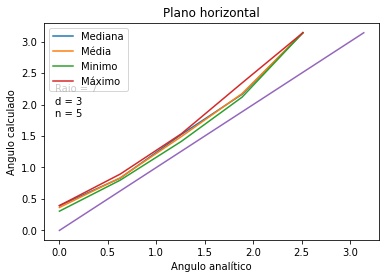

In [29]:
x = (0, np.pi)
y = (0, np.pi)

plt.plot(angreal, mediana, label='Mediana')
plt.plot(angreal, angP, label='Média')
plt.plot(angreal, minimo, label='Minimo')
plt.plot(angreal, maximo, label='Máximo')
plt.xlabel('Angulo analítico')
plt.ylabel('Angulo calculado')
plt.text(-0.05,2.2,'Raio = %.i' %raio)
plt.text(-0.05,2,'d = %.i' %d)
plt.text(-0.05,1.8,'n = %.i' %n)


plt.title('Plano horizontal')
#plt.title('Plano inclinado')
#plt.title('Plano inclinado 2')


plt.legend()
plt.plot(x, y)